<b><h1><u>TECHNOHACKS EDUTECH DATA SCIENCE INTERNSHIP

<h2>Task-3:- Employee Turnover Prediction

<h4>Use a dataset of employee information and
build a model that can predict which
employees are most likely to leave the
company


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [131]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [133]:
df.shape

(1470, 35)

In [134]:
# checking for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [135]:
# checking for duplicates
df.duplicated().sum()

0

In [136]:
# seperating Categorical and Numerical columns
cat=[i for i in df.columns if df[i].dtype == "object"]
num=[i for i in df.columns if df[i].dtype != "object"]

In [137]:
cat,num

(['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

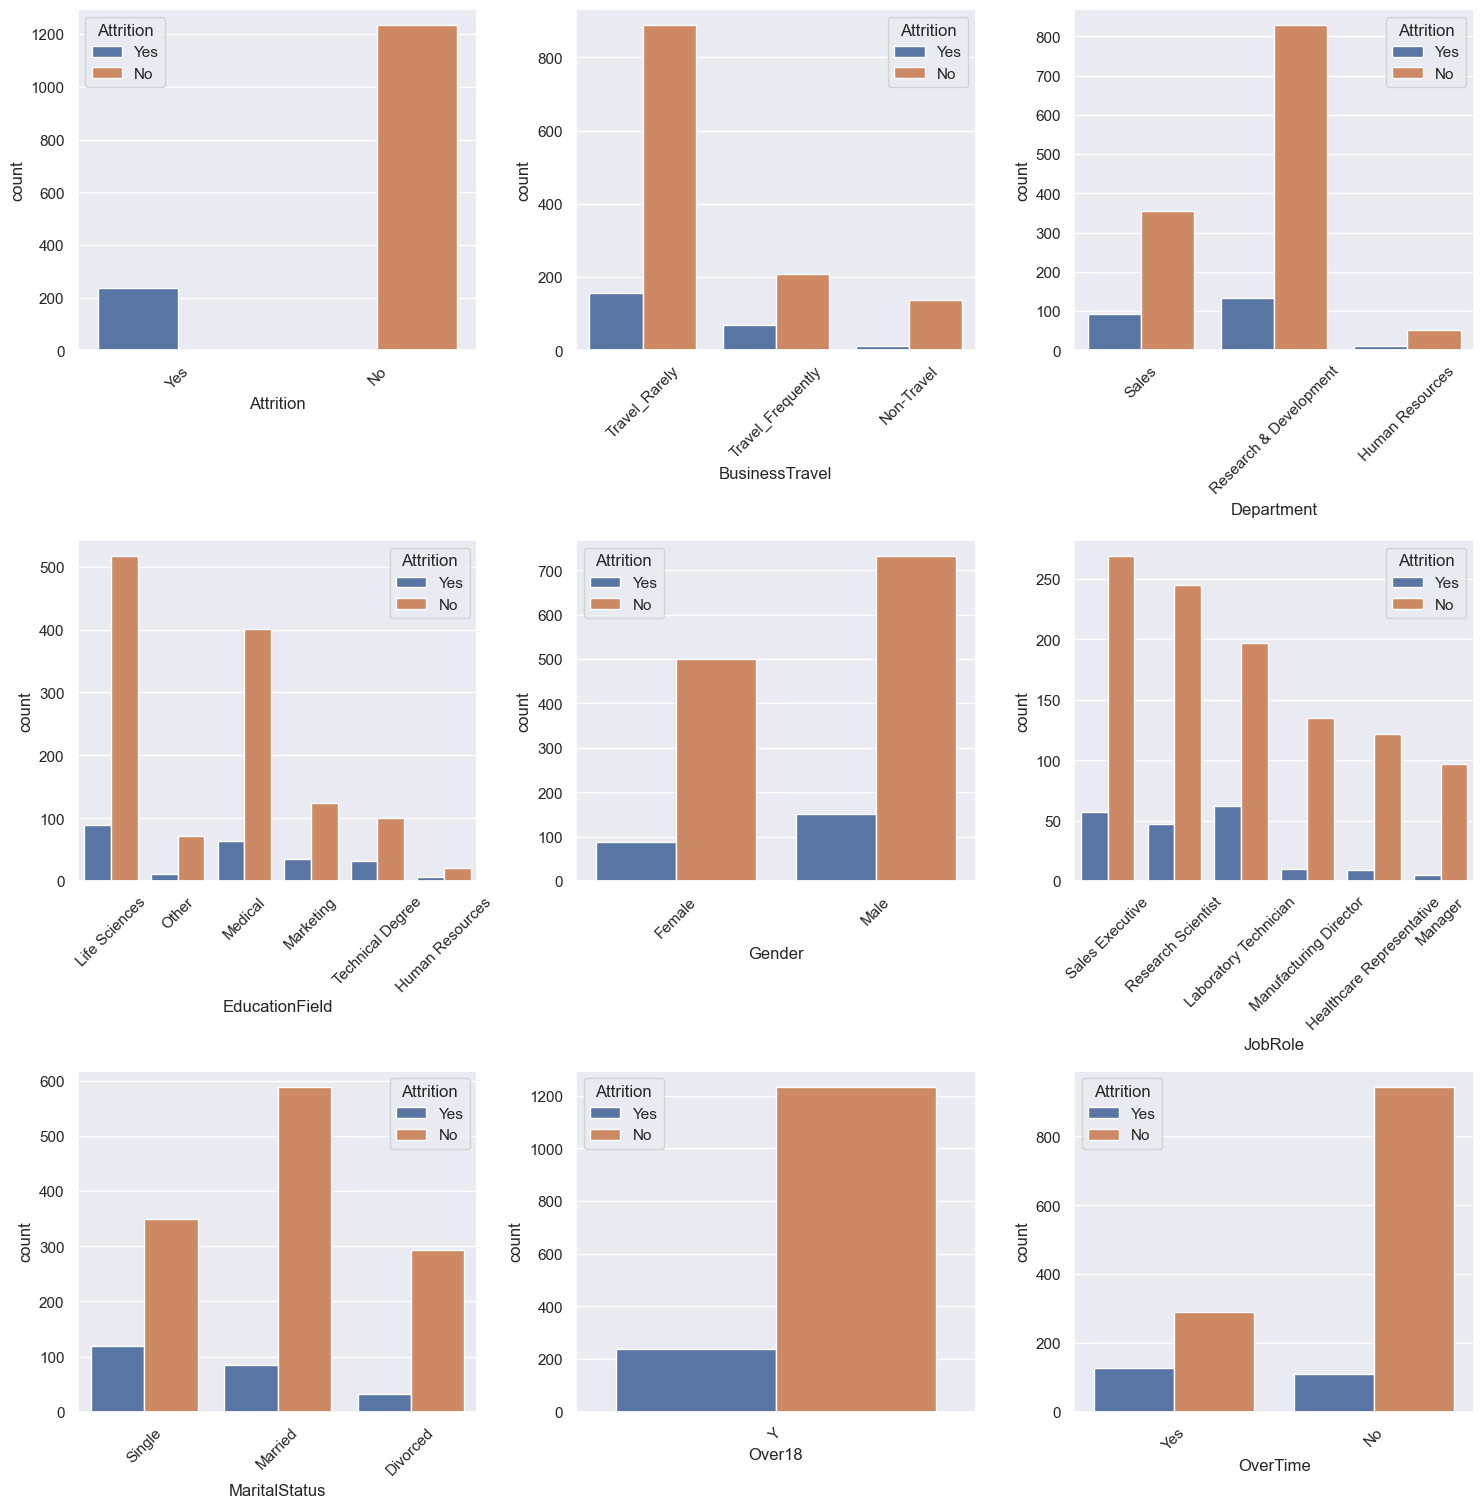

In [138]:
# Get the names of all columns with data type 'object' (categorical variables)
#cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat)
num_rows = (num_cols + 2) // 2  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Attrition', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [139]:
cat, num

(['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

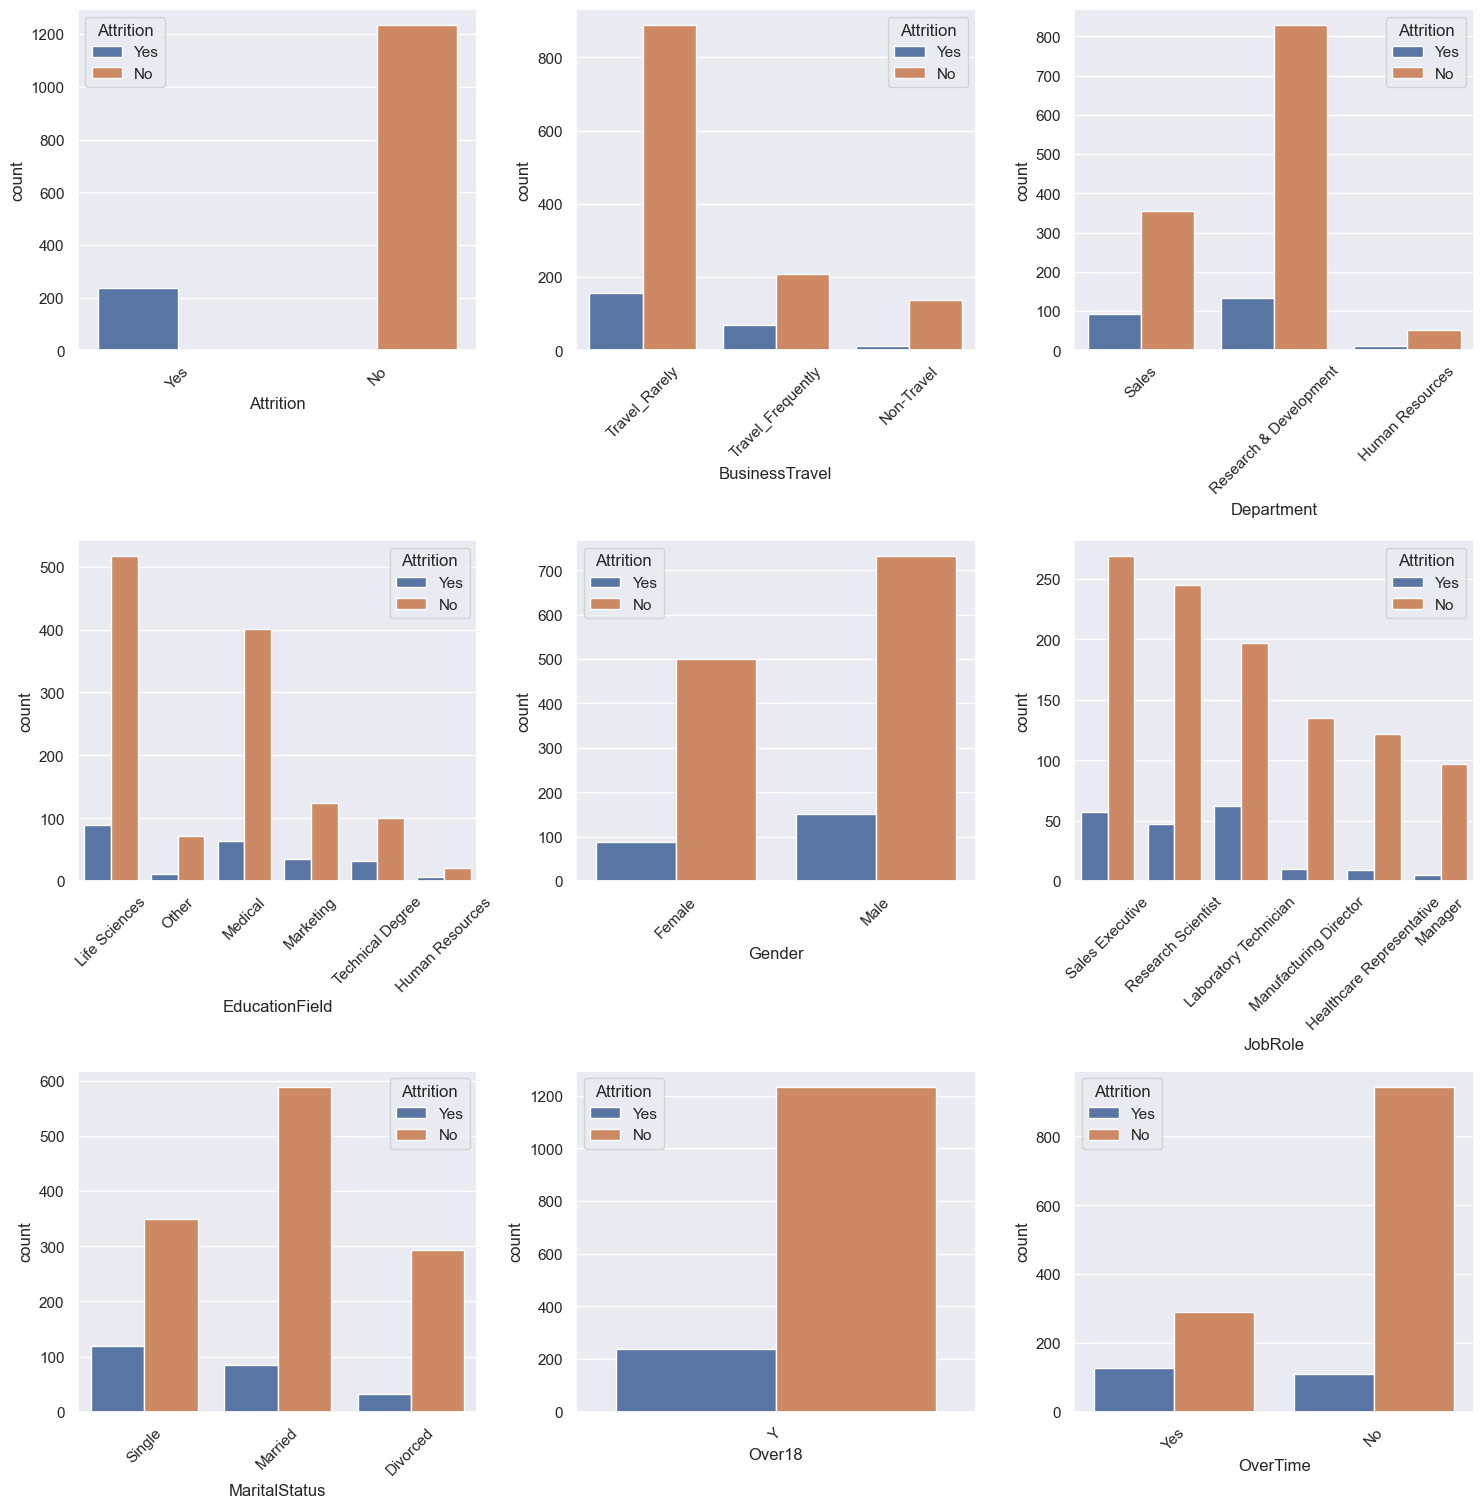

In [140]:
# Get the names of all columns with data type 'object' (categorical variables)
#cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat)
num_rows = (num_cols + 2) // 2  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Attrition', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Checking for outliers

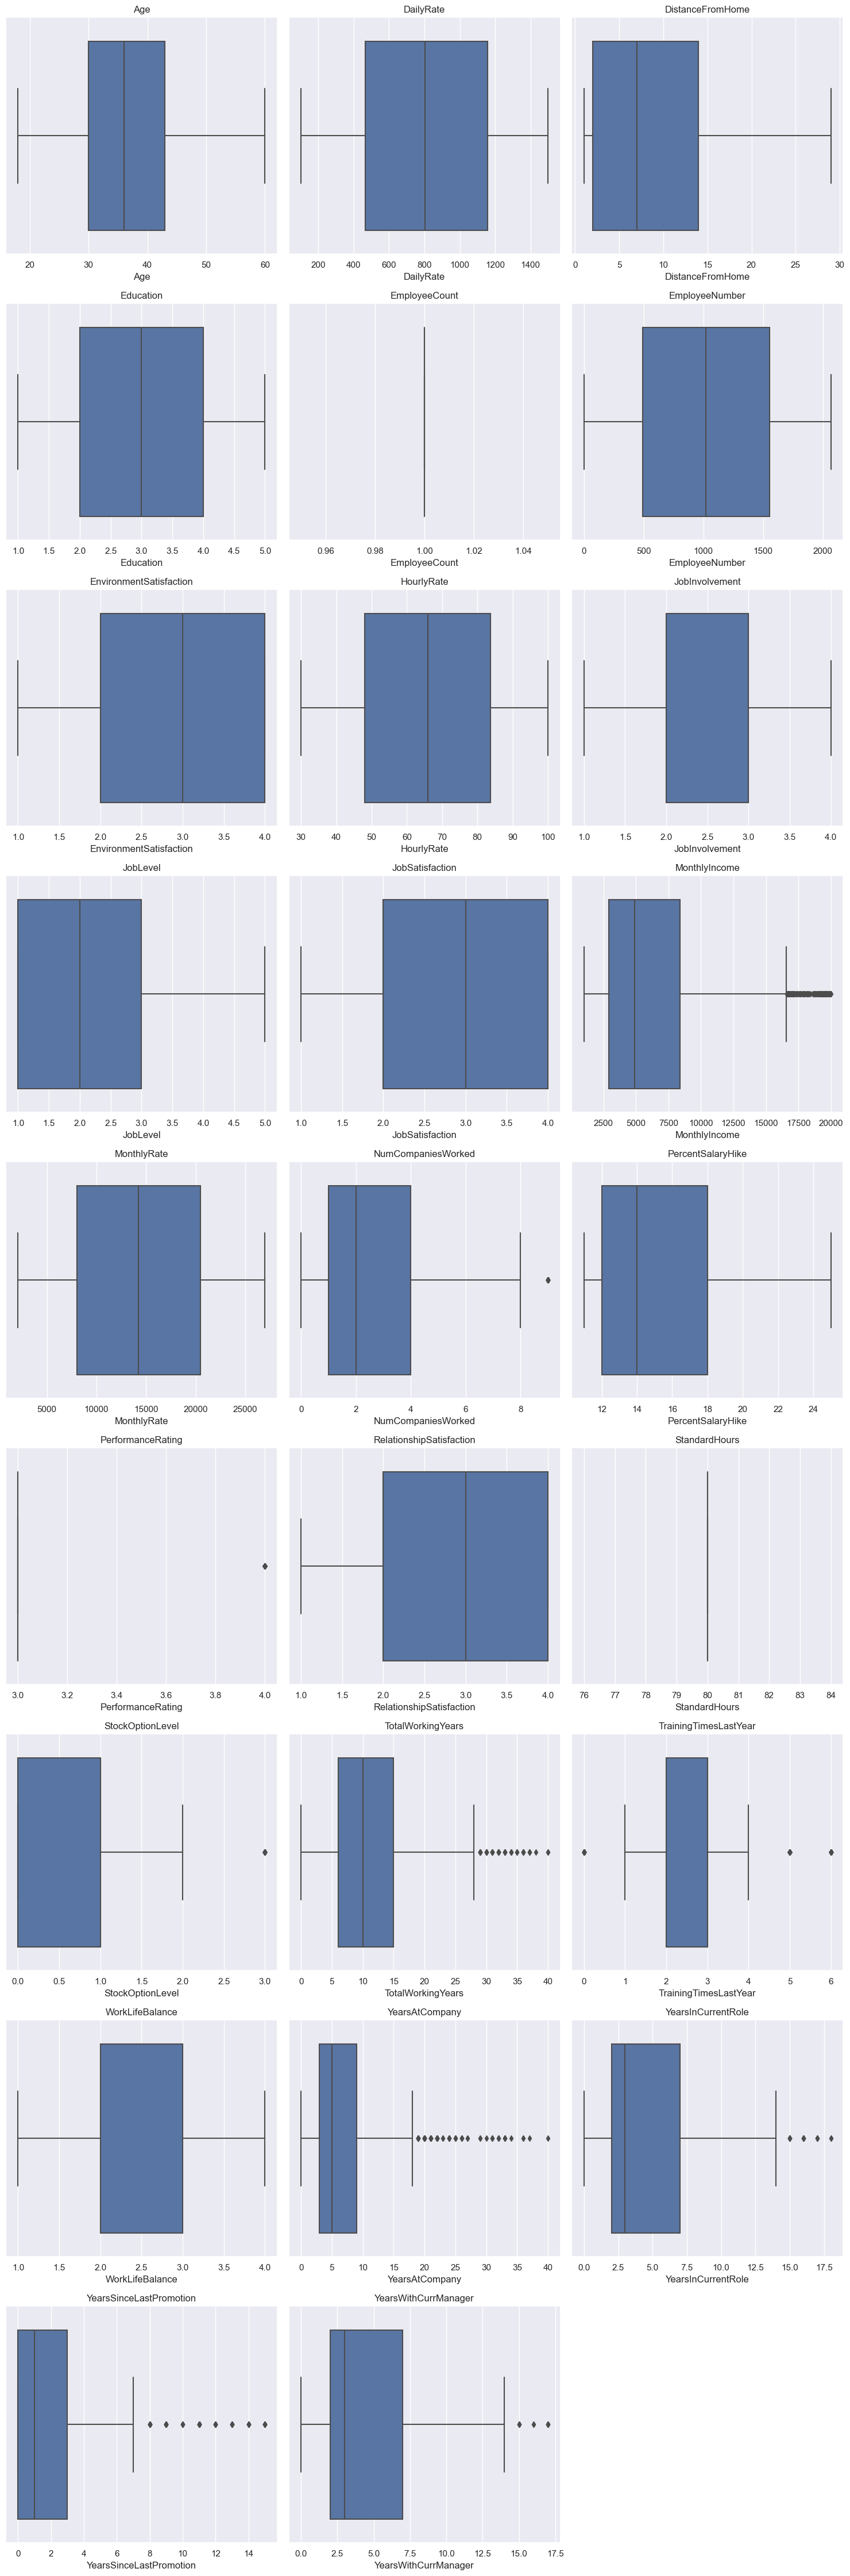

In [141]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

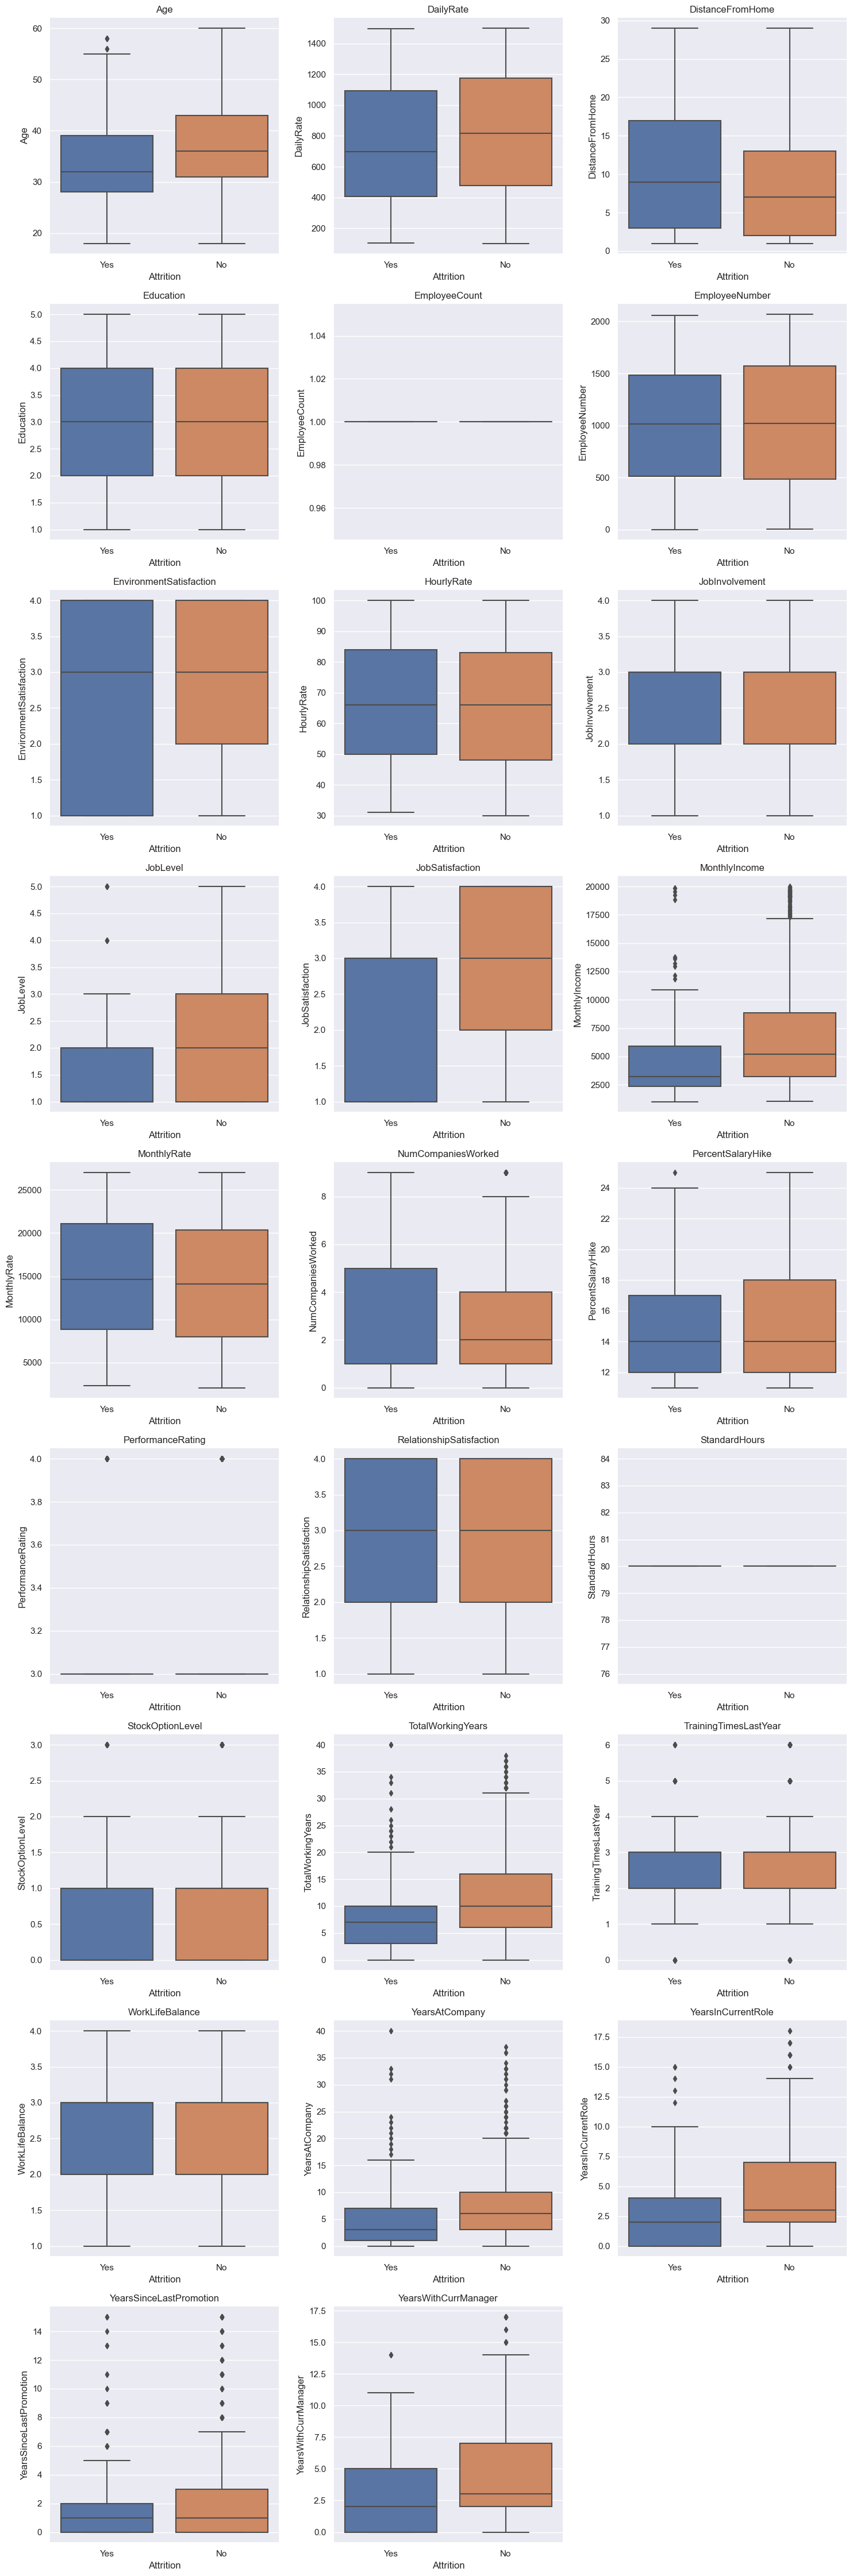

In [142]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num):
    sns.boxplot(y=var, x='Attrition', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Categorical to Numerical

In [143]:
# Categorical columns with their unique values
for i in cat:
    print("{}:- {}, {}".format(i,df[i].nunique(), df[i].unique()))

Attrition:- 2, ['Yes' 'No']
BusinessTravel:- 3, ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:- 3, ['Sales' 'Research & Development' 'Human Resources']
EducationField:- 6, ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:- 2, ['Female' 'Male']
JobRole:- 9, ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:- 3, ['Single' 'Married' 'Divorced']
Over18:- 1, ['Y']
OverTime:- 2, ['Yes' 'No']


In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
    # Print the column name and the unique encoded values
    print(f"{i}: {df[i].unique()}")

Attrition: [1 0]
BusinessTravel: [2 1 0]
Department: [2 1 0]
EducationField: [1 4 3 2 5 0]
Gender: [0 1]
JobRole: [7 6 2 4 0 3 8 5 1]
MaritalStatus: [2 1 0]
Over18: [0]
OverTime: [1 0]


<Axes: >

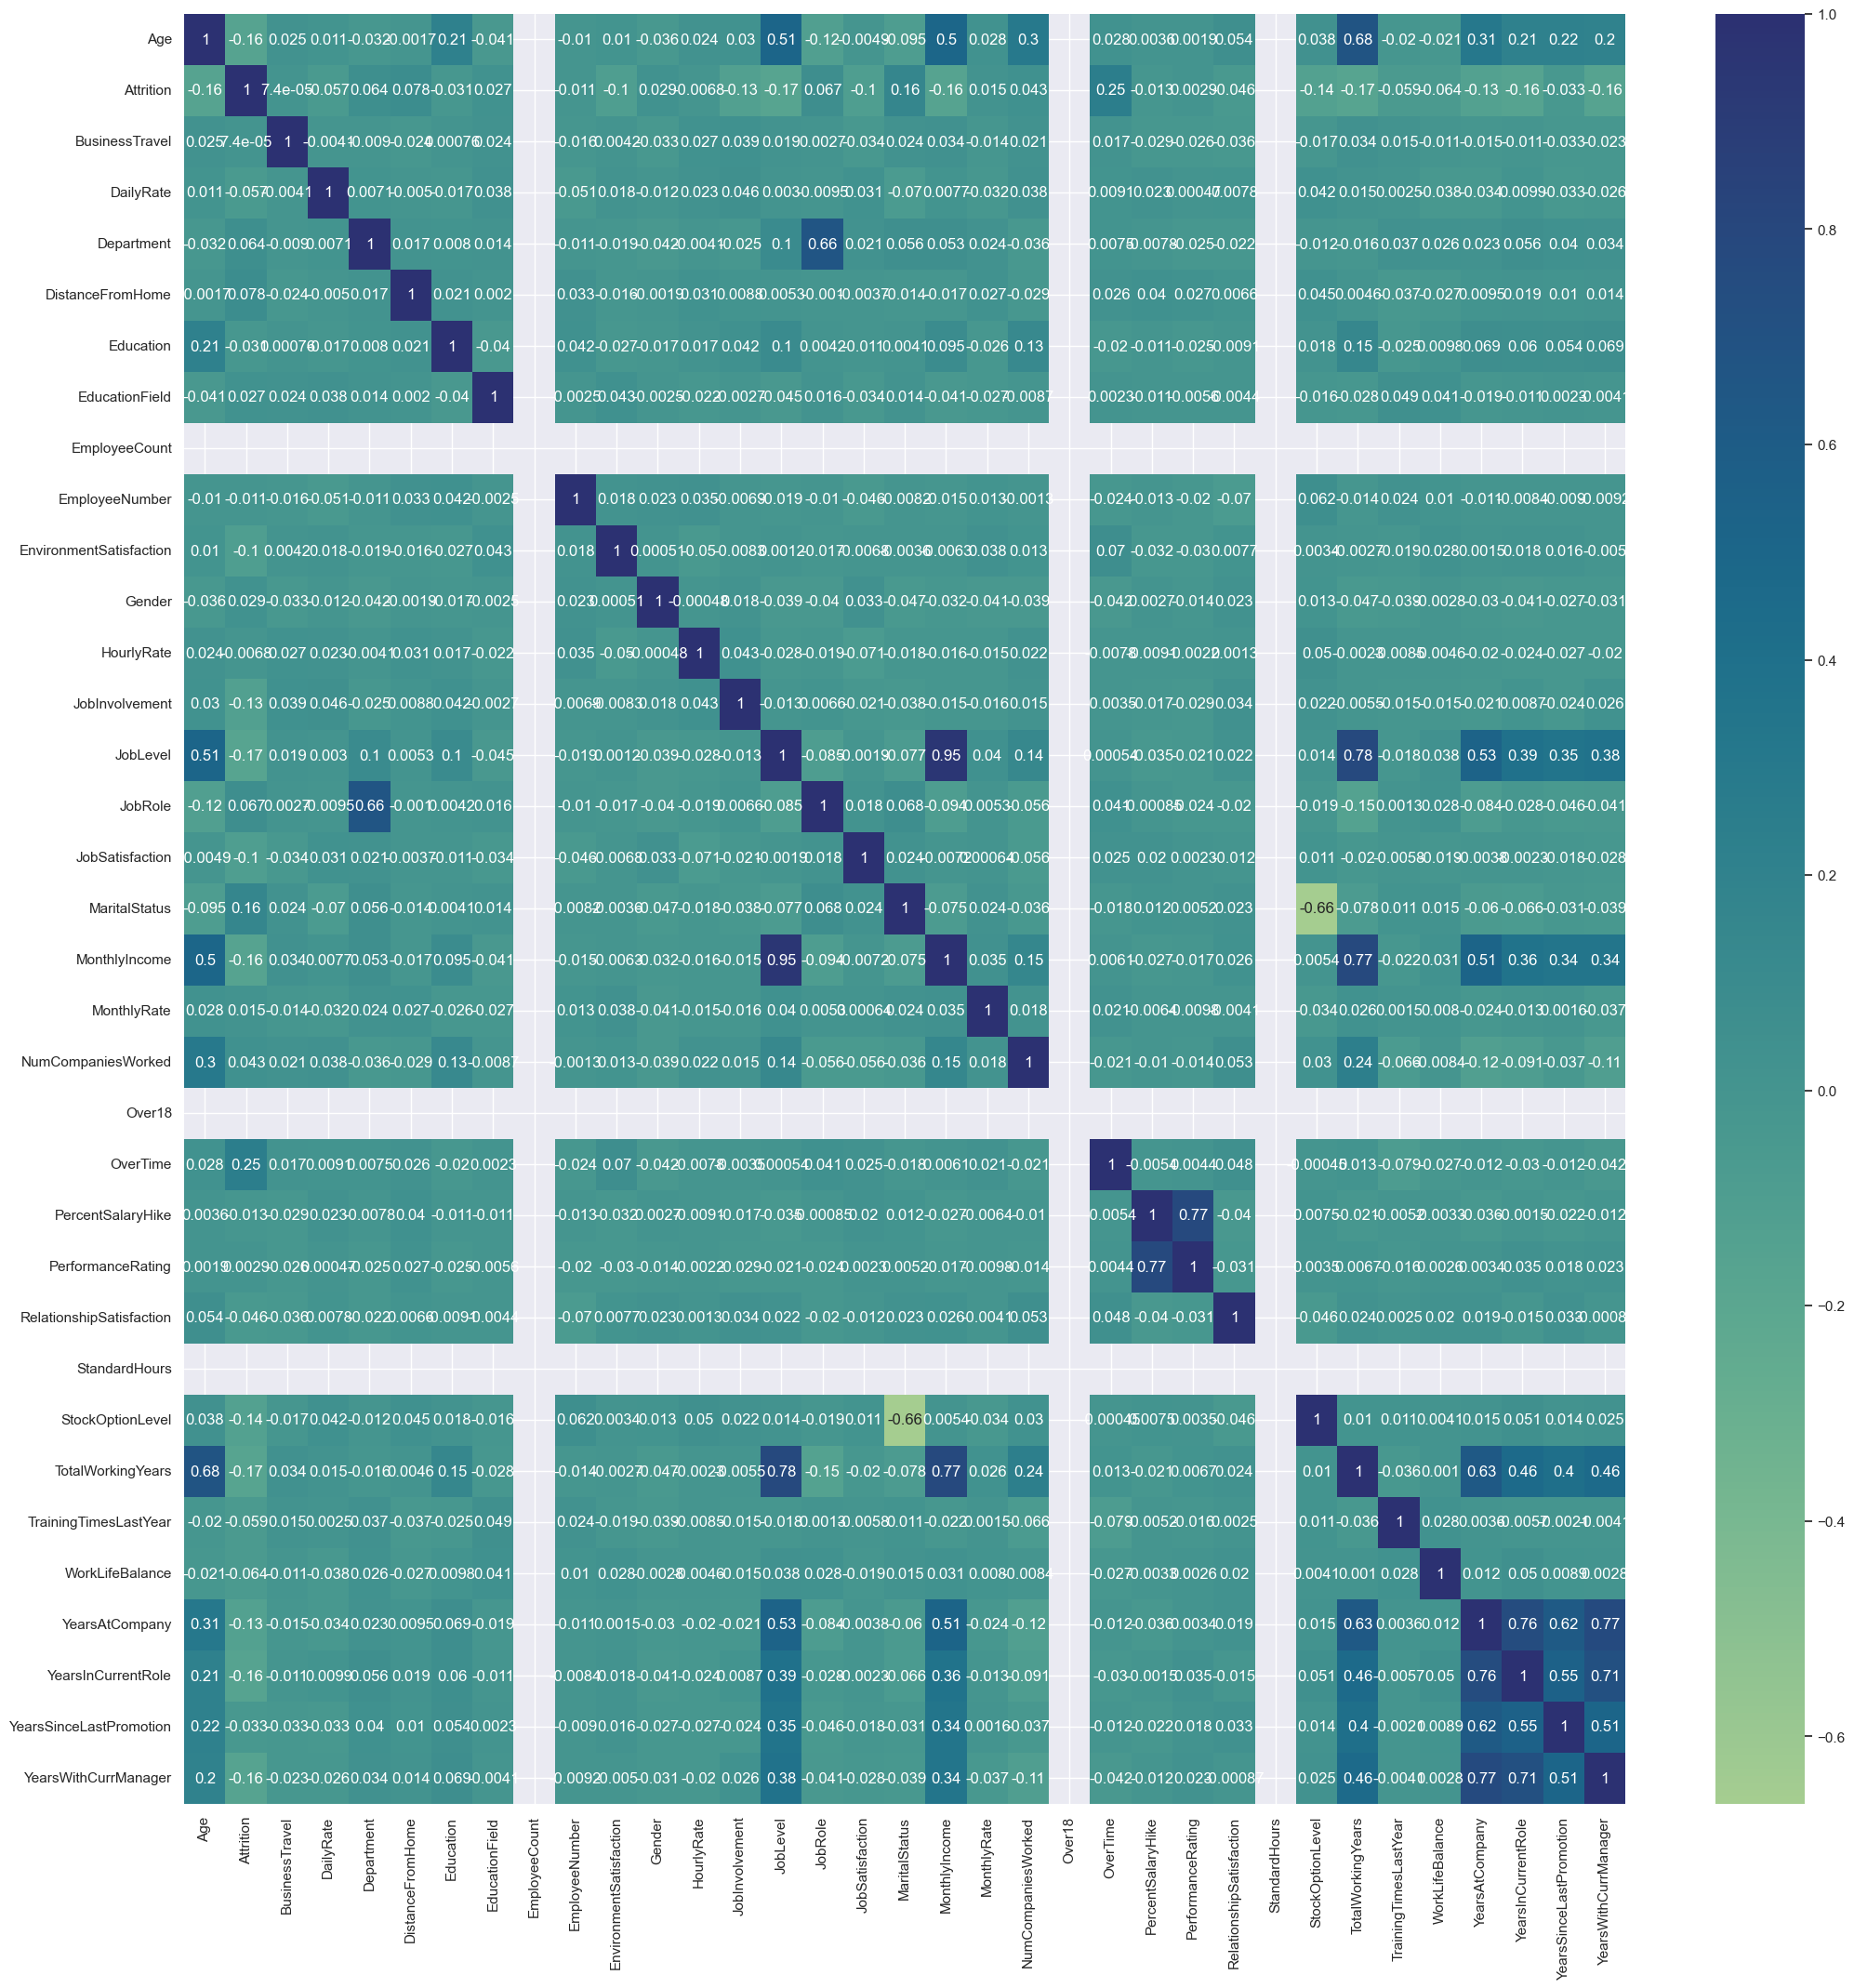

In [145]:
# checking the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="crest")

In [146]:
# removing these columns because of Zero correlation
df.drop(columns = ["EmployeeCount", "Over18", "StandardHours"], inplace=True)
df.shape

(1470, 32)

In [147]:
num.remove("EmployeeCount")
num.remove("StandardHours")

## Decision Tree Classifier

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [149]:
#input data and output data
X=df.drop("Attrition", axis=1)
y=df["Attrition"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Removing Outlier from Train Data using Z-score

In [150]:
num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [151]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [152]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [153]:
# passing the test data
y_pred=dtree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

**Metrics**

In [154]:
# Metrics on (y_test, y_prediction)

dtree_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",dtree_acc)
dtree_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",dtree_precision)
dtree_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",dtree_recall)
dtree_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",dtree_F1)

Accuracy:-  80.95
precision:-  0.42
recall:-  0.51
F1-score:-  0.46


confusion matrix:-  [[214  33]
 [ 23  24]]


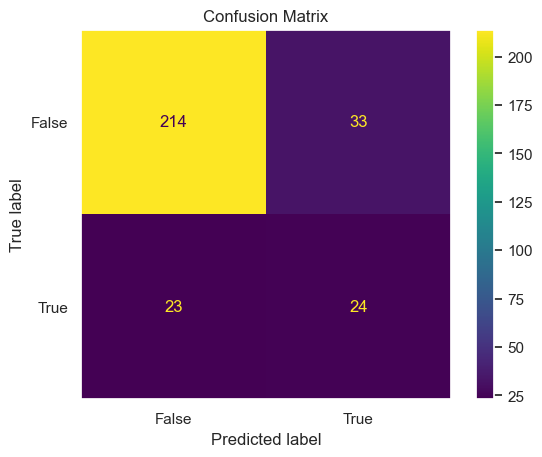

True negative: 214
False postive: 33
False negative: 23
True postive: 24


In [155]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

## Logistic Regression

In [156]:
#input data and output data
X=df.drop("Attrition", axis=1)
y=df["Attrition"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Removing Outlier from Train Data using Z-score

In [157]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [158]:
#  Training the model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [159]:
#s5 prediction
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Metrics**

In [160]:
# Metrics on (y_test, y_prediction)

logreg_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",logreg_acc)
logreg_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",logreg_precision)
logreg_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",logreg_recall)
logreg_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",logreg_F1)

Accuracy:-  84.69
precision:-  1.0
recall:-  0.04
F1-score:-  0.08


confusion matrix:-  [[247   0]
 [ 45   2]]


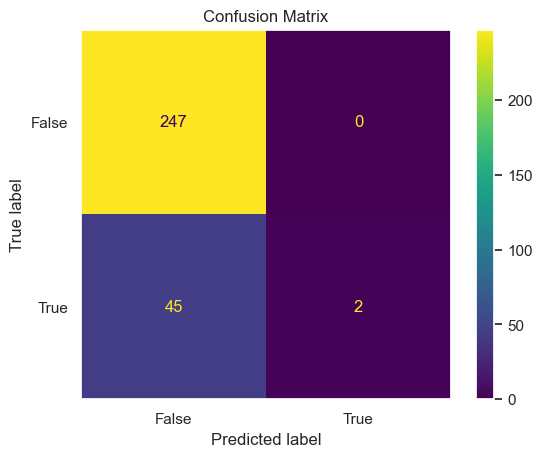

True negative: 247
False postive: 0
False negative: 45
True postive: 2


In [161]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

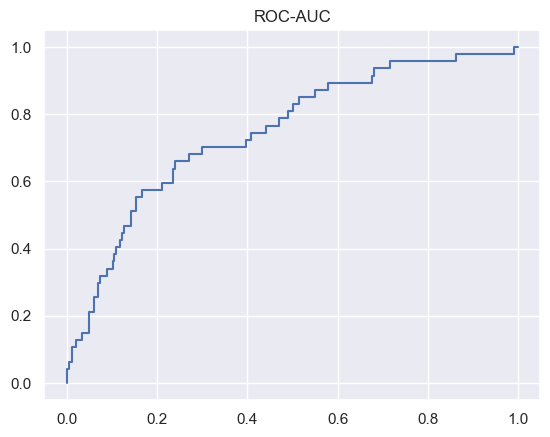

In [162]:
#  ROC-AUC curve
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Naive Bayes

In [163]:
#input data and output data
X=df.drop("Attrition", axis=1)
y=df["Attrition"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Removing Outlier from Train Data using Z-score

In [164]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [165]:
# s4 Training the model
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

In [166]:
#s5 prediction
y_pred=gNB.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

**Metrics**

In [167]:
# Metrics on (y_test, y_prediction)
gNB_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",gNB_acc)
gNB_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",gNB_precision)
gNB_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",gNB_recall)
gNB_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",gNB_F1)

Accuracy:-  80.95
precision:-  0.44
recall:-  0.7
F1-score:-  0.54


confusion matrix:-  [[205  42]
 [ 14  33]]


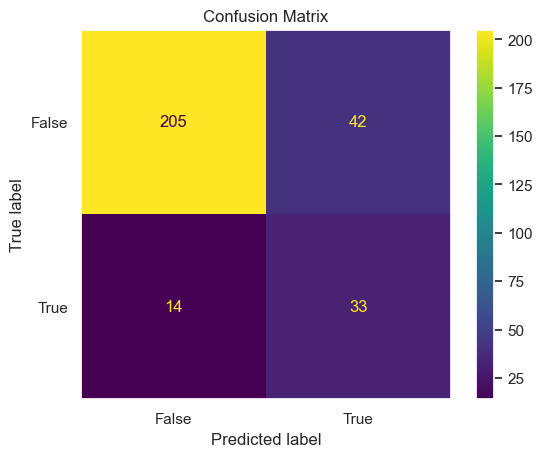

True negative: 205
False postive: 42
False negative: 14
True postive: 33


In [168]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

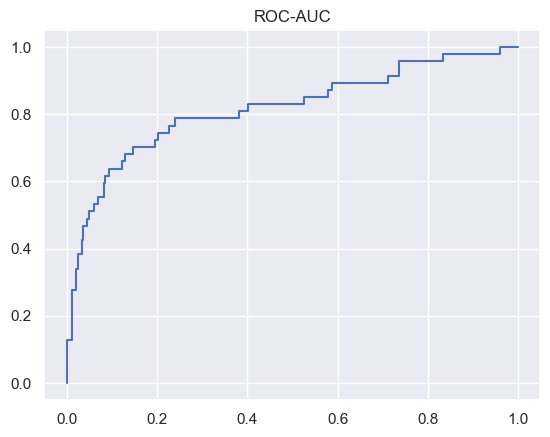

In [169]:
#  ROC-AUC curve
y_pred_proba=gNB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## KNN

In [170]:
#input data and output data
X=df.drop("Attrition", axis=1)
y=df["Attrition"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Removing Outlier from Train Data using Z-score

In [171]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [172]:
#  Training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [173]:
# prediction
y_pred=knn.predict(X_test.values)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Metrics**

In [174]:
# Metrics on (y_test, y_prediction)
knn_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",knn_acc)
knn_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",knn_precision)
knn_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",knn_recall)
knn_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",knn_F1)

Accuracy:-  81.97
precision:-  0.29
recall:-  0.09
F1-score:-  0.13


confusion matrix:-  [[237  10]
 [ 43   4]]


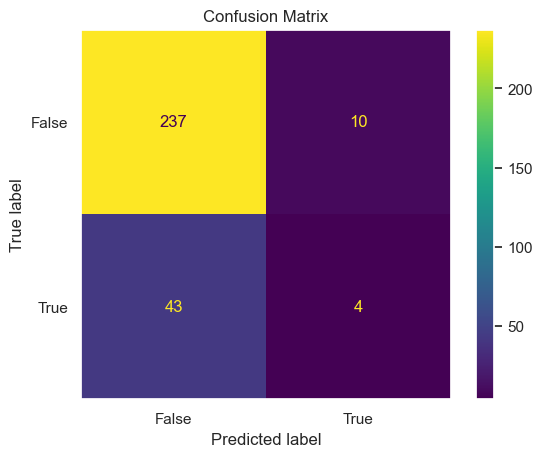

True negative: 237
False postive: 10
False negative: 43
True postive: 4


In [175]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

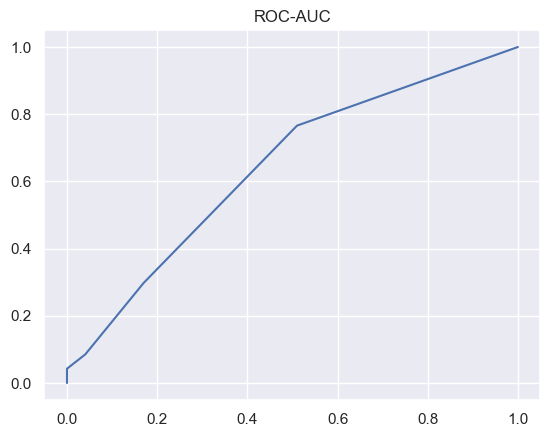

In [176]:
#  ROC-AUC curve
y_pred_proba=knn.predict_proba(X_test.values)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Random Forest

In [177]:
#input data and output data
X=df.drop("Attrition", axis=1)
y=df["Attrition"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 31)
(1176,)
(294, 31)
(294,)


### Removing Outlier from Train Data using Z-score

In [178]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [179]:
#  Training the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
# prediction
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Metrics**

In [181]:
# Metrics on (y_test, y_prediction)
rfc_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",rfc_acc)
rfc_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",rfc_precision)
rfc_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",rfc_recall)
rfc_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",rfc_F1)

Accuracy:-  87.07
precision:-  1.0
recall:-  0.19
F1-score:-  0.32


confusion matrix:-  [[247   0]
 [ 38   9]]


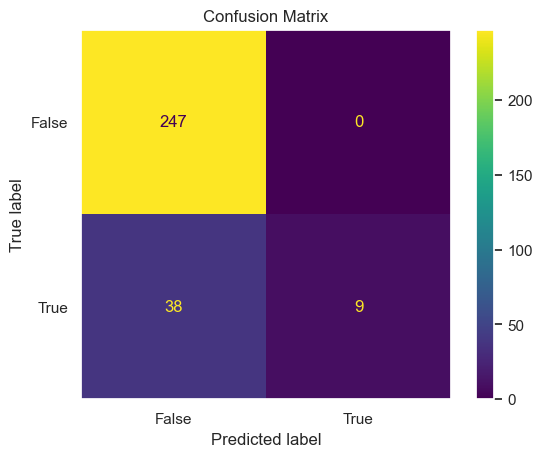

True negative: 247
False postive: 0
False negative: 38
True postive: 9


In [182]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

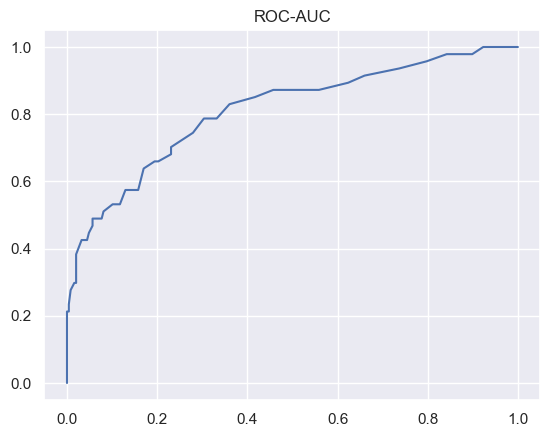

In [183]:
#  ROC-AUC curve
y_pred_proba=rfc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Metrices df

**Combine Metrices df of models without hyperparameters**

In [184]:
dict1={"Accuracy":[dtree_acc,logreg_acc,gNB_acc,knn_acc,rfc_acc],
      "Precision":[dtree_precision,logreg_precision,gNB_precision,knn_precision,rfc_precision],
      "Recall":[dtree_recall,logreg_recall,gNB_recall,knn_recall,rfc_recall],
      "F1-score":[dtree_F1,logreg_F1,gNB_F1,knn_F1,rfc_F1]}

dict1=pd.DataFrame(dict1,index=['Decision Tree','Logistic Reg.','Naive Bayes','KNN','Random Forest'])
dict1

,Accuracy,Precision,Recall,F1-score
Decision Tree,80.95,0.42,0.51,0.46
Logistic Reg.,84.69,1.00,0.04,0.08
Naive Bayes,80.95,0.44,0.70,0.54
KNN,81.97,0.29,0.09,0.13
Random Forest,87.07,1.00,0.19,0.32


### Selecting the best model

### Random Forest

In [185]:
rfc

RandomForestClassifier()

In [186]:
rfc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [187]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

<h3><center><b> $Thank-You$